In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output

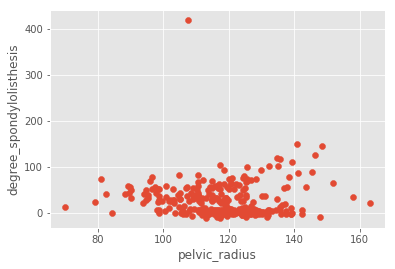

In [4]:
data = pd.read_csv('/home/vishal/Videos/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()



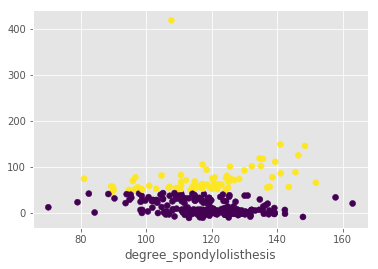

In [5]:
# KMeans Clustering
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [6]:
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)


class   Abnormal  Normal
labels                  
0            138     100
1             72       0


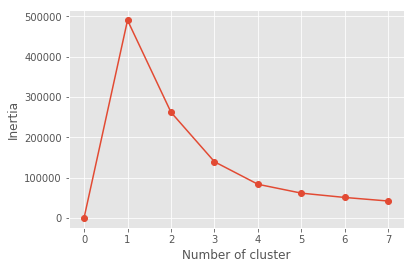

In [7]:
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()


In [9]:
data = pd.read_csv('/home/vishal/Videos/column_2C_weka.csv')
data3 = data.drop('class',axis = 1)


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            115      10
1             95      90


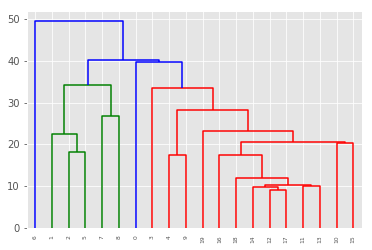

In [11]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()



In [12]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)


Principle components:  [[  3.23645647e-01   1.13192291e-01   3.03674740e-01   2.10453357e-01
   -2.99598300e-02   8.63153779e-01]
 [ -4.76634849e-01  -9.85632787e-02  -5.32783979e-01  -3.78071570e-01
    3.21809199e-01   4.82438036e-01]
 [ -1.54481282e-03  -2.64657410e-01  -4.96541893e-01   2.63112598e-01
   -7.74612852e-01   1.18940778e-01]
 [  3.73677251e-01   7.54113757e-01  -3.39411757e-01  -3.80436506e-01
   -1.75106042e-01  -3.29143086e-02]
 [ -4.41703869e-01   7.35414748e-02   5.12024113e-01  -5.15245344e-01
   -5.14639730e-01   8.35992525e-02]
 [  5.77350269e-01  -5.77350269e-01  -1.08928422e-11  -5.77350269e-01
   -3.59061392e-12   3.06732417e-12]]


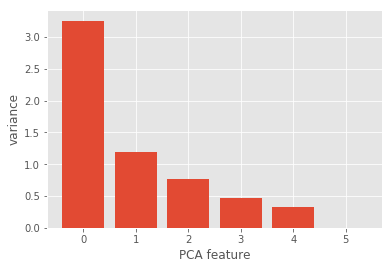

In [13]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()


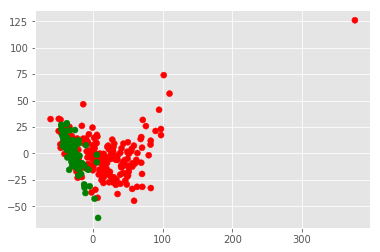

In [15]:
# apply PCA
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()
